# k-th order statistic

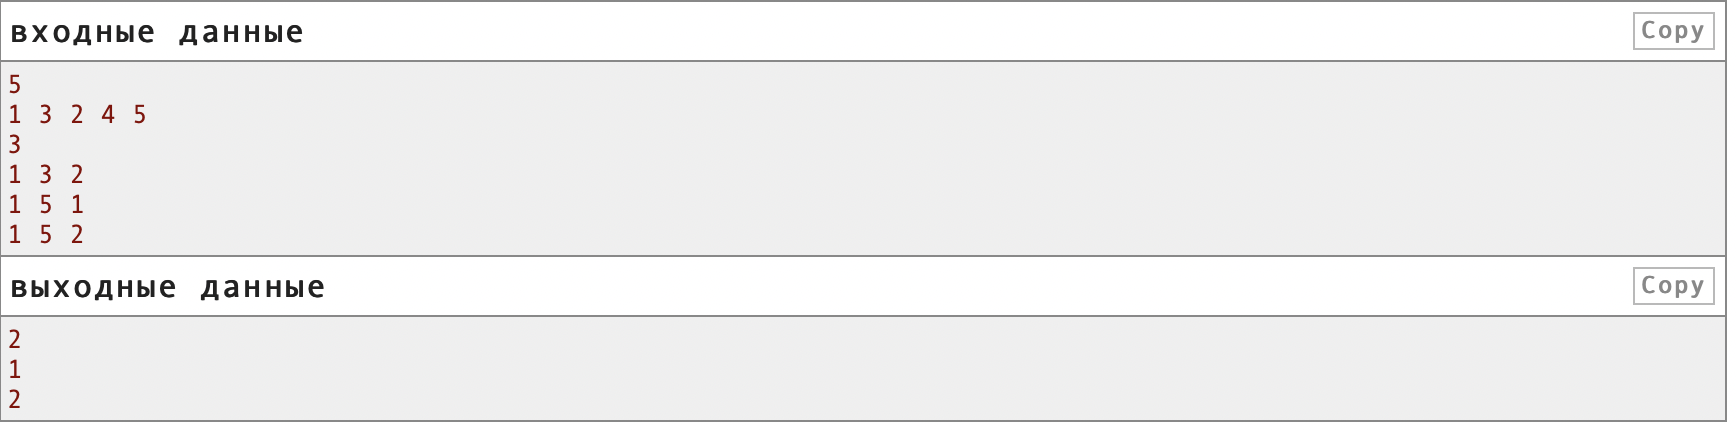

In [136]:
import random


def split(arr, l, r, x):
    m1 = l
    i = l
    m2 = r - 1
    while i <= m2:
        if arr[i] < x:
            arr[m1], arr[i] = arr[i], arr[m1]
            m1 += 1
            i += 1
        elif arr[i] > x:
            arr[i], arr[m2] = arr[m2], arr[i]
            m2 -= 1
        else:
            i += 1
    return m1, m2


def find_kth(arr, l, r, kth):
    if r - l <= 1:
        return arr[kth]
    x = random.choice(arr[l:r])
    m1, m2 = split(arr, l, r, x)
    if m1 <= kth <= m2:
        return arr[kth]
    elif kth < m1:
        return find_kth(arr, l, m1, kth)
    else:
        return find_kth(arr, m2 + 1, r, kth)


_ = input()
arr = list(map(int, input().split()))
m = int(input())
for _ in range(m):
    i, j, k = list(map(int, input().split()))
    l = i - 1
    r = j
    kth = k - 1
    print(find_kth(arr[l:r], 0, r - l, kth))

6
1 3 2 2 1 3
1
1 6 3
2


# Counting Sort

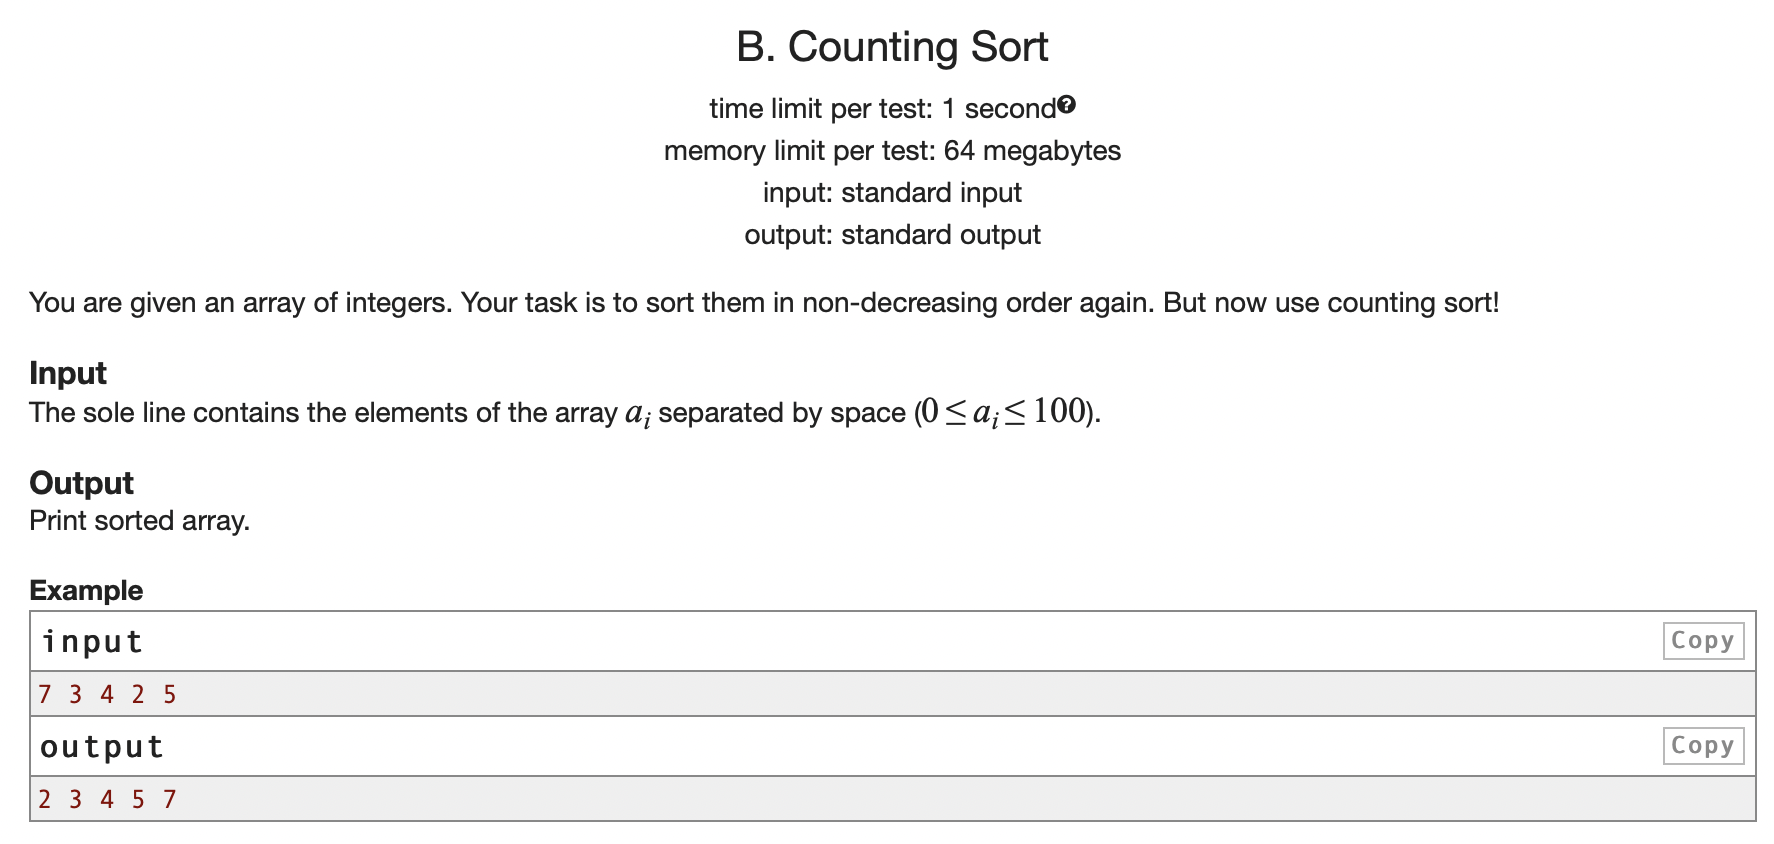

In [4]:
MIN_VALUE = 0
MAX_VALUE = 100


def counting_sort(arr):
    cnt = [0] * (MAX_VALUE - MIN_VALUE + 1)
    for val in arr:
        cnt[val - MIN_VALUE] += 1

    for ind, val in enumerate(range(MIN_VALUE, MAX_VALUE + 1)):
        if cnt[ind]:
            values = [val] * cnt[ind]
            print(*values, end=" ")


arr = list(map(int, input().split()))
counting_sort(arr)

2 1
1 2 

# Radix Sort

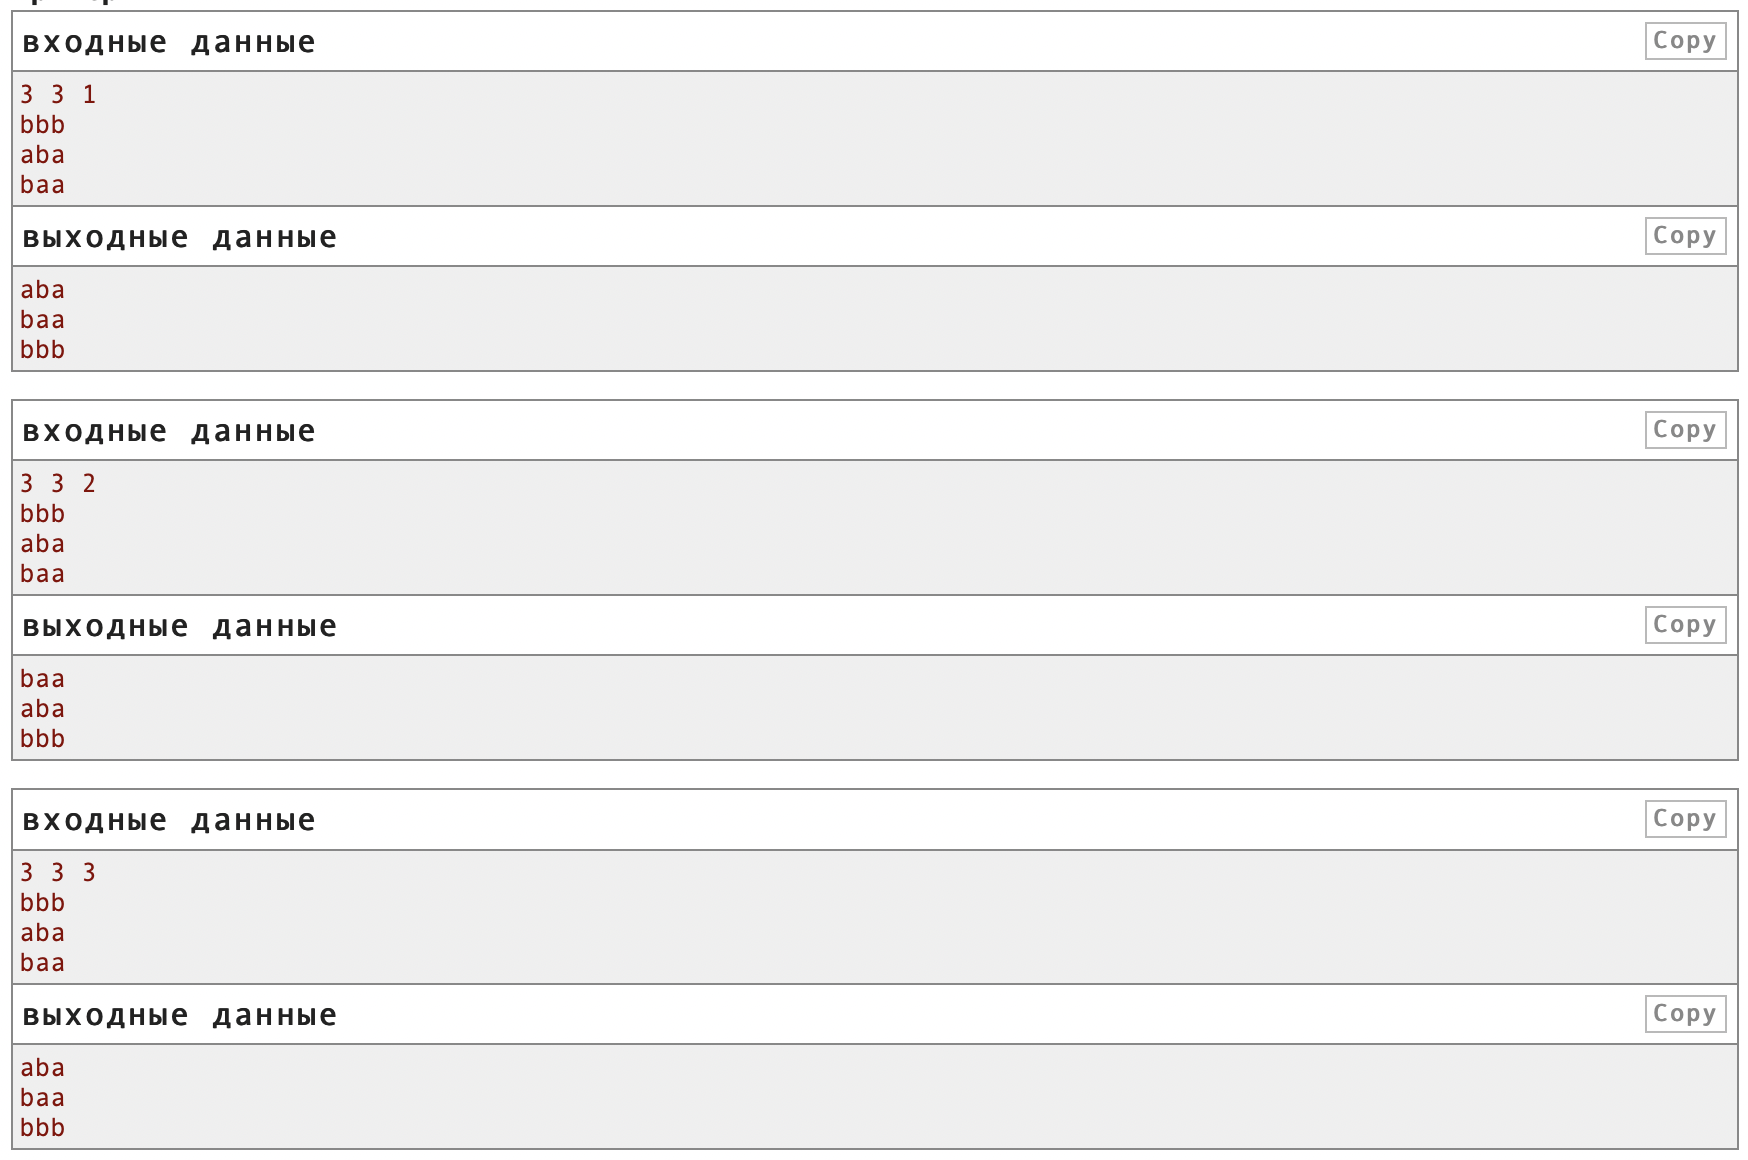

In [185]:
MIN_LETTER_ORD = ord('a')
MAX_LETTER_ORD = ord('z')


def count_sort_stable(arr, col):
    cnt = [0] * (MAX_LETTER_ORD - MIN_LETTER_ORD + 1)
    for item in arr:
        letter = ord(item[-col]) - MIN_LETTER_ORD
        cnt[letter] += 1

    p = [0] * len(cnt)
    for i in range(1, len(cnt)):
        p[i] = p[i - 1] + cnt[i - 1]

    a_new = [None] * len(arr)
    for i in range(len(arr)):
        letter = ord(arr[i][-col]) - MIN_LETTER_ORD
        a_new[p[letter]] = arr[i]
        p[letter] += 1
    return a_new


def radix_sort(arr, k):
    for col in range(1, k + 1):
        arr = count_sort_stable(arr, col)
    return arr


n, _, k = list(map(int, input().split()))
arr = [input() for _ in range(n)]
print(*radix_sort(arr, k), sep='\n')

3 3 2
bbb
aba
baa
baa
aba
bbb


# Grisha after Party

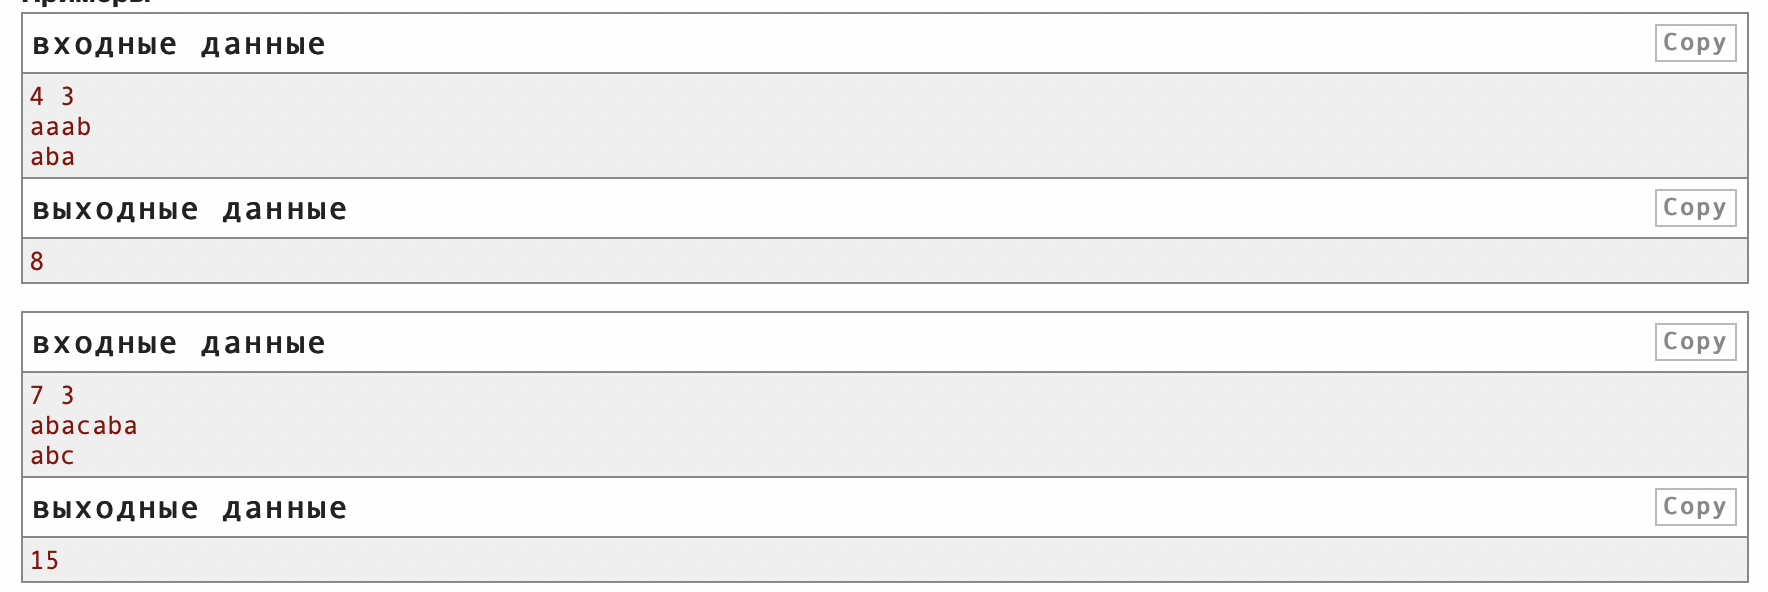

In [ ]:
class Letter():
    def __init__(self, char, next_char, cnt_before_addition):
        

In [100]:
class GrishaAP():

    def __init__(self, s, t):
        self.g_string = s
        self.c_string = t
        self.min_letter = 'a'
        self.max_letter = 'z'

    def get_substrings_leq_k(self, string, k):
        length = len(string)
        for i in range(length):
            for j in range(i + 1, length + 1):
                if j - i > k:
                    break
                yield(string[i:j])
    
    def get_counter(self, arr, min_letter = 'a', max_letter = 'z'):
        cnt = [0] * (ord(max_letter) - ord(min_letter) + 1)
        for item in arr:
            letter = ord(item) - ord(min_letter)
            cnt[letter] += 1
        return cnt
    
    def count_substrings(self):
        c_cnt_original = self.get_counter(self.c_string)
        c_cnt = c_cnt_original.copy()
        count = 0
        letters_in_substring = 0
        c_cnt_prev_letters = dict()
        for letter in enumerate(self.g_string):
            char = ord(letter) - ord(self.min_letter)
            if c_cnt[char] > 0:
                if char in c_cnt_prev_letter:
                    c_cnt_prev_letter[char].append([letters_in_substring, c_cnt.copy()])
                else:
                    c_cnt_prev_letter[char] = [[letters_in_substring, c_cnt.copy()]]
                c_cnt[char] -= 1
                letters_in_substring += 1
                count += letters_in_substring
            else:
                if char in c_cnt_prev_letter and c_cnt_prev_letter[char]:
#                     print('#' * 100)
#                     print(c_cnt_prev_letter[char]['letters_in_substring'])
#                     print(letters_in_substring)
#                     new_char = c_cnt_prev_letter[char][0][2]
#                     letters_in_substring -= c_cnt_prev_letter[new_char][0][0]
                    print('#' * 100)
                    print(new_char)
                    print(c_cnt)
                    print(c_cnt_prev_letter[new_char])
                    c_cnt_prev_letter[char].pop(0)
                    c_cnt_prev_letter[char].append([letters_in_substring, c_cnt.copy(), next_char])
                    c_cnt = [current + (original - prev)
                             for original, current, prev  in zip(c_cnt_original, c_cnt, c_cnt_prev_letter[new_char][0][1])]
                    for val in c_cnt_prev_letter.values():
                        for prev in val:
                            prev[1][char] += 1
                            prev[0] -= 1
#                     print(c_cnt)
                else:
                    c_cnt = c_cnt_original.copy()
                    letters_in_substring = 0
                    c_cnt_prev_letter[char] = [[letters_in_substring, c_cnt.copy()]]
                c_cnt[char] -= 1
                letters_in_substring += 1
                count += letters_in_substring
            prev_letter = letter
            print(f'{char=}')
            print(f'{count=}')
            print(f'{c_cnt_prev_letter=}')
            print(f'{c_cnt=}')
            print(f'{letters_in_substring=}')
        return count

# _ = list(map(int, input().split()))
# s = input()
# t = input()
s = 'abacaba'
t = 'abc'
G = GrishaAP(s, t)
print(G.count_substrings())

char=0
count=1
c_cnt_prev_letter={0: [[0, [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1]]}
c_cnt=[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
letters_in_substring=1
char=1
count=3
c_cnt_prev_letter={0: [[0, [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1]], 1: [[1, [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0]]}
c_cnt=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
letters_in_substring=2
####################################################################################################
1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1, [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0]]
char=0
count=5
c_cnt_prev_letter={0: [[0, [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2]], 1: [[0, [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
class GrishaAP():
 
    def __init__(self, m, s, t):
        self.c_string_len = m
        self.g_string = s
        self.c_string = t
 
    def get_substrings_leq_k(self, string, k):
        length = len(string)
        for i in range(length):
            for j in range(i + 1, length + 1):
                if j - i > k:
                    break
                yield(string[i:j])
    
    def get_counter(self, arr, min_letter = 'a', max_letter = 'z'):
        cnt = [0] * (ord(max_letter) - ord(min_letter) + 1)
        for item in arr:
            letter = ord(item) - ord(min_letter)
            cnt[letter] += 1
        return cnt
    
    def count_substrings(self):
        c_cnt = self.get_counter(self.c_string)
        count = 0
        for substring in self.get_substrings_leq_k(self.g_string, self.c_string_len):
            g_cnt_substring = self.get_counter(substring)
            is_composible = True
            for i in range(len(g_cnt_substring)):
                if c_cnt[i] < g_cnt_substring[i]:
                    is_composible = False
                    break
            if is_composible:
                count += 1
        return count
 
# _, m = list(map(int, input().split()))
# s = input()
# t = input()
# s = 'aaab'
# t = 'aba'
m = len(t)
G = GrishaAP(m, s, t)
print(G.count_substrings())

8
